In [1]:
import networkit as nk
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
import ndlib.models.CompositeModel as gc
#import ndlib.models.compartments as nc

from bokeh.io import output_notebook, show
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

#NK and GT don't have methods to read adjacency lists.

#Size of graph is currently: 1.2m nodes, 8.7m edges
#Method 1 - Import GML into NK, then create NX graph (29s)
#gmlReader = nk.graphio.GMLGraphReader()
#G = gmlReader.read("dataset.gml")
#print(G.numberOfNodes())
#print(G.numberOfEdges())

#graph = nx.Graph()

#print("Adding nodes...")
#for i in G.iterNodes():
#    graph.add_node(i)

#print("Adding edges...")
#for i in G.iterEdges():
#    graph.add_edge(i[0],i[1])

#del(G)
#print(len(graph.nodes()))
#print(len(graph.edges()))

#Method 2 - Read adjacency list into NX (37s)
#G = nx.read_adjlist('dataset.adjlist')
#print(len(G.nodes()))
#print(len(G.edges()))

#Method 3 - Read GML into GT (1m)
#graph = gt.load_graph("dataset.gml")
#print(len(graph.get_vertices()))
#print(len(graph.get_edges()))

#Method 4 - Read GML into NX (8.30m)
#G = nx.read_gml('dataset.gml', label='id')
#relabeled = nx.convert_node_labels_to_integers(G)
#del(G)
#print(len(relabeled.nodes()))
#print(len(relabeled.edges()))

#Method 5 - Read Pickle into NX ()
G = nx.read_gpickle('Datasets/dataset.gpickle')
relabeled = nx.convert_node_labels_to_integers(G)
del(G)
print(len(relabeled.nodes()))
print(len(relabeled.edges()))

1230324
8745187


In [ ]:
for i in nx.get_edge_attributes(relabeled,'weight'):
    print(relabeled.edges[i]['weight'])
    break;

In [ ]:
#STANDARD SEIR MODEL SIMULATION
print("Simulating...")
# Model selection
model = ep.SEIRModel(relabeled)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.57)
cfg.add_model_parameter('gamma', 0.15)
cfg.add_model_parameter('alpha', 0.2)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(10,progress_bar=True)
trends = model.build_trends(iterations)

In [2]:
#CUSTOM SEIR_AS MODEL SIMULATION
print("Simulating...")
from ndlibCustom.SEIR_ASModel import SEIR_ASModel
# Model selection
model = SEIR_ASModel(relabeled)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.57) #Infection rate from I_A/S Neighbors
cfg.add_model_parameter('gamma', 0.15) #Recovery/Removal rate
cfg.add_model_parameter('alpha', 0.2) #Latent period
cfg.add_model_parameter('kappa', 0.25) #Symptomatic/Asymptomatic Ratio

#This parameter "smoothens" out the infection rate in the first iterations.
#1: 1-(1-beta)^(num_of_infected_neighbors)[0.99 on > 5 infected neighbors]
#2: beta*(average_infected_weight)
cfg.add_model_parameter('tp_rate', 0) #Infection rate does not depend on neighbour sample size


cfg.add_model_parameter("fraction_infected", 0.005) #Starting infected nodes
model.set_initial_status(cfg)

# Simulation execution
#iteration = model.iteration()
iterations = model.iteration_bunch(50,progress_bar=True)
trends = model.build_trends(iterations)

  0%|          | 0/50 [00:00<?, ?it/s]

Simulating...


100%|██████████| 50/50 [04:30<00:00,  5.41s/it]


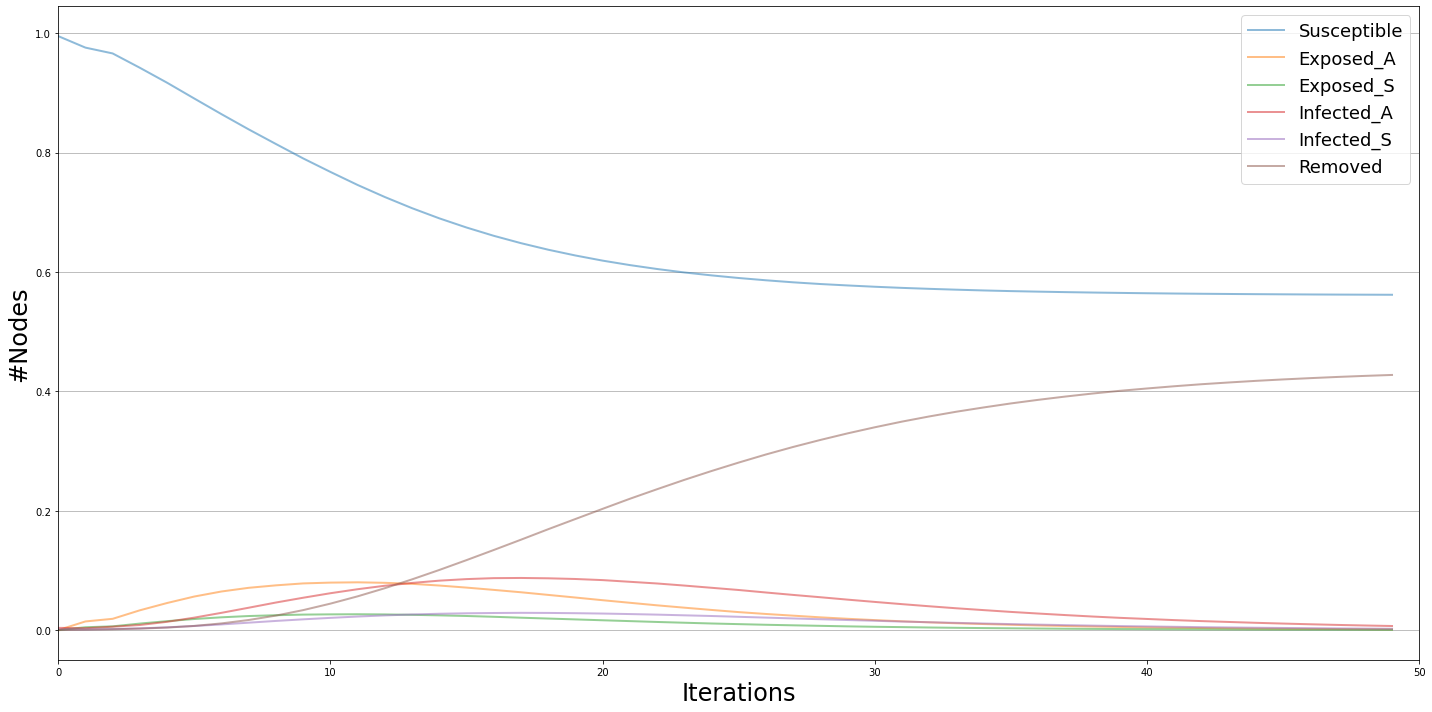

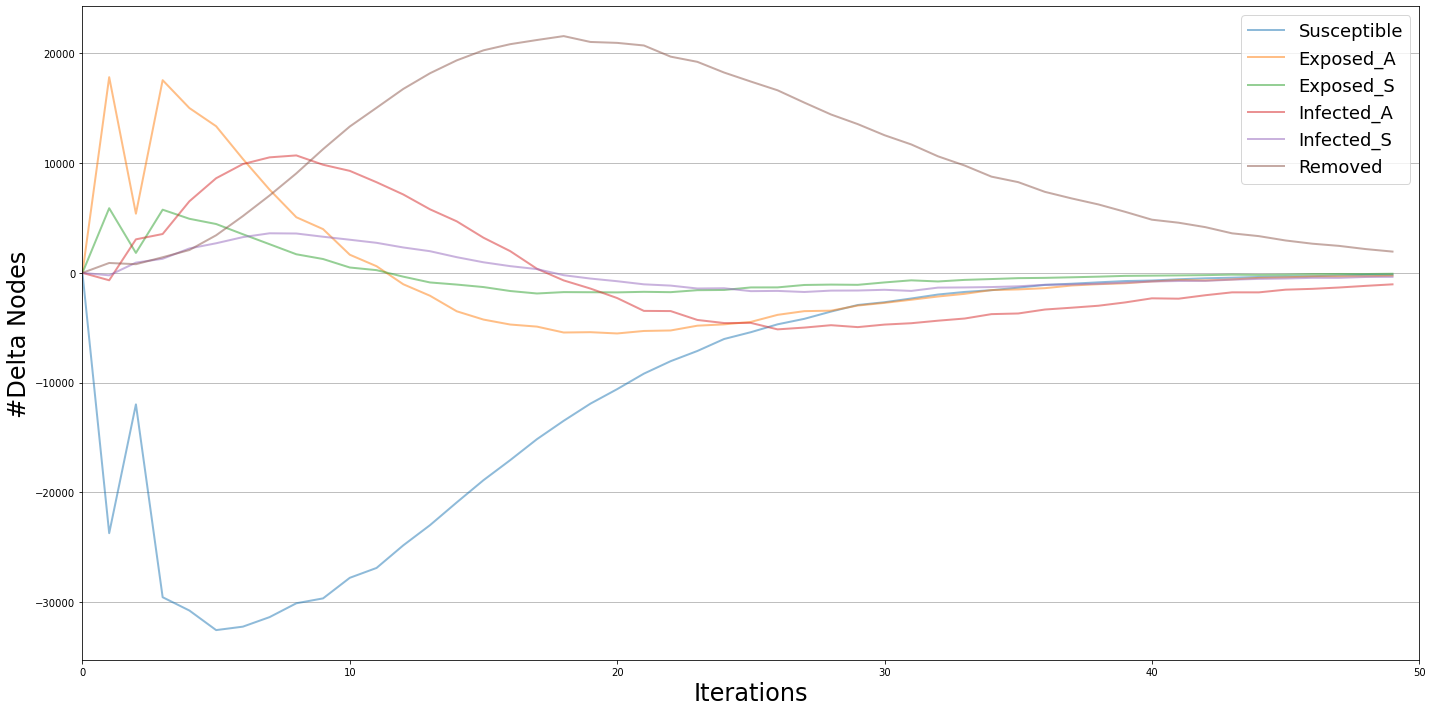

In [4]:
viz = DiffusionTrend(model, trends)
p = viz.plot()

viz2 = DiffusionPrevalence(model, trends)
p2 = viz2.plot()

Text(0, 0.5, 'ECCDF')

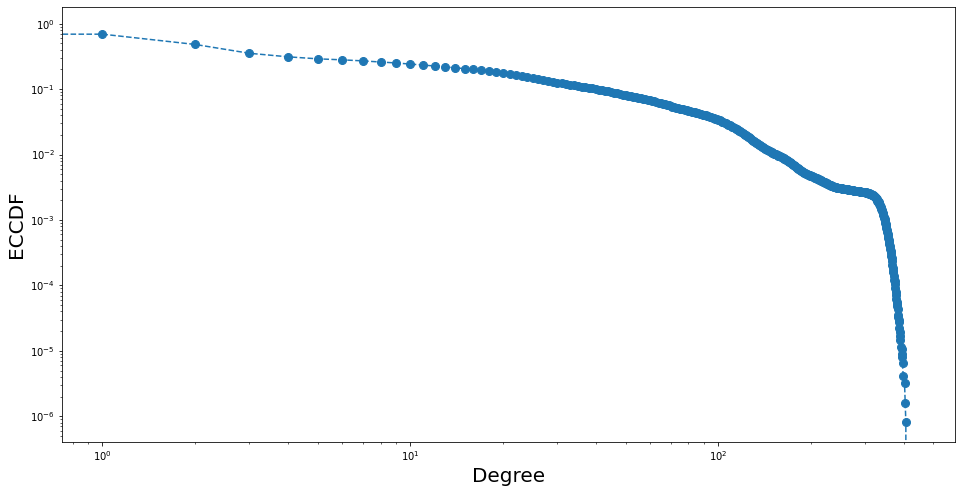

In [5]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

density = nx.density(relabeled)
degree = list(dict(relabeled.degree()).values())
#ECCDF in loglog scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(16,8))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size=20)


In [39]:
print(model.get_info())
print(model.get_status_map())
print(iterations[0].keys())
#print(iterations[99]['node_count'])
print(iter['status'])

{'beta': 0.57, 'gamma': 0.15, 'alpha': 0.2, 'kappa': 0.25, 'tp_rate': 0, 'fraction_infected': 0.005}
{'Susceptible': 0, 'Exposed_A': 1, 'Exposed_S': 2, 'Infected_A': 3, 'Infected_S': 4, 'Removed': 5}
dict_keys(['iteration', 'status', 'node_count', 'status_delta'])
{268: 5, 2913: 5, 3091: 5, 4122: 5, 4727: 5, 5394: 5, 6985: 5, 6993: 5, 7844: 5, 10862: 5, 13006: 5, 13074: 5, 13182: 5, 13757: 3, 15242: 5, 15818: 5, 15949: 5, 18607: 5, 20547: 5, 21659: 5, 22125: 5, 23272: 5, 25510: 5, 26192: 5, 26246: 5, 27131: 1, 27945: 5, 28193: 5, 29528: 5, 29895: 5, 31252: 5, 31309: 5, 36286: 5, 37598: 5, 37600: 5, 38118: 5, 39380: 5, 39608: 3, 39734: 5, 42001: 4, 43271: 5, 46141: 5, 48932: 5, 49172: 5, 49376: 5, 50060: 5, 52886: 5, 54602: 5, 56597: 5, 57874: 5, 58570: 5, 58694: 3, 60954: 5, 62568: 5, 63037: 3, 63777: 5, 65127: 5, 65555: 5, 69390: 5, 72739: 5, 73314: 5, 74526: 5, 77107: 5, 77774: 5, 79882: 4, 79883: 3, 80735: 5, 84241: 4, 84821: 5, 87390: 5, 87423: 5, 87638: 3, 87697: 5, 87703: 5, 8853

In [28]:
#Create complete status map by dymanically rebuilding infection iteration results
#Keys are nodes, values are final statuses
#Look for keys in graph to get attributes

graph_stat = {}
for i in relabeled.nodes():
    graph_stat[i] = 0
for iter in iterations:
    for s in iter['status']:
        graph_stat[s] = iter['status'][s]
        

    

5
